In [1]:
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [1]:
Image("img/picture.png")

NameError: name 'Image' is not defined

In [2]:
prices = Table.read_table('F2_bids_5.csv').sort('PORTFOLIO')
prices

TEAM,TEAM_ID,PORTFOLIO,PORTFOLIO_ID,PLANT,PLANT_ID,PERIOD,PRICE1,PRICE2,PRICE3,PRICE4
Friedman,5,Bay_Views,3,MORRO_BAY_1-2,31,5,47.33,47.33,47.33,47.33
Friedman,5,Bay_Views,3,MORRO_BAY_3-4,32,5,45,45,45,45
Friedman,5,Bay_Views,3,MOSS_LANDING_6,33,5,40,40,40,40
Friedman,5,Bay_Views,3,MOSS_LANDING_7,34,5,40,40,40,40
Friedman,5,Bay_Views,3,OAKLAND,35,5,150,150,150,150
Debreu,4,Beachfront,4,COOLWATER,41,5,61.99,61.99,66.89,66.89
Debreu,4,Beachfront,4,ETIWANDA_1-4,42,5,62.27,62.27,67.16,67.16
Debreu,4,Beachfront,4,ETIWANDA_5,43,5,91.69,91.69,98.89,98.89
Debreu,4,Beachfront,4,ELLWOOD,44,5,111.21,111.21,120.11,120.11
Debreu,4,Beachfront,4,MANDALAY_1-2,45,5,56.65,56.65,61.05,61.05


In [3]:
# if you sort both tables by PORTFOLIO and Group respectively, you can see that the columns line up

ESG = Table.read_table('ESGPorfolios_.csv').sort("Group")
ESG

Group,Group_num,UNIT NAME,Capacity_MW,Heat_Rate_MMBTUperMWh,Fuel_Price_USDperMMBTU,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay
Bay_Views,3,MORRO BAY 1&2,335,8.51,4.5,38.28,0.5,38.78,0.45,"$2,000"
Bay_Views,4,MORRO BAY 3&4,665,8.02,4.5,36.11,0.5,36.61,0.43,"$4,000"
Bay_Views,4,MOSS LANDING 6,750,6.9,4.5,31.06,1.5,32.56,0.37,"$8,000"
Bay_Views,4,MOSS LANDING 7,750,6.9,4.5,31.06,1.5,32.56,0.37,"$8,000"
Bay_Views,4,OAKLAND,150,13.48,4.5,60.67,0.5,61.17,0.72,$0
Beachfront,5,COOLWATER,650,9.31,4.5,41.89,0.5,42.39,0.49,"$2,000"
Beachfront,5,ETIWANDA 1-4,850,9.15,4.5,41.17,1.5,42.67,0.49,"$8,000"
Beachfront,5,ETIWANDA 5,150,13.64,4.5,61.39,1.5,62.89,0.72,"$1,000"
Beachfront,5,ELLWOOD,300,16.69,4.5,75.11,0.5,75.61,0.89,$0
Beachfront,5,MANDALAY 1&2,300,8.35,4.5,37.56,1.5,39.06,0.44,"$1,000"


In [4]:
# if you sort both tables by PORTFOLIO and Group respectively, you can see that the columns line up

big_coal = prices.where("PORTFOLIO","Big_Coal")
capacities = ESG.where("Group","Big Coal").column('Capacity_MW')

In [5]:
def pair_cap_to_price(table1, table2, price_number):
    res = []
    for i in range(0, table1.num_rows):
        res.append((table1.column("Capacity_MW")[i], table2.column("PRICE" + str(price_number))[i]))
    return res

In [6]:
lst = pair_cap_to_price(ESG, prices, 1)

In [7]:
key = lambda x: x[0]
sorted_lst = sorted(lst, key=key)

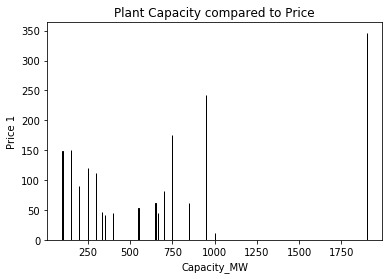

In [8]:
x_val = [x[0] for x in sorted_lst]
y_val = [x[1] for x in sorted_lst]


plt.bar(x_val, y_val)
plt.title('Plant Capacity compared to Price')
plt.xlabel('Capacity_MW')
plt.ylabel('Price 1')
plt.show()